<a href="https://colab.research.google.com/github/karim-mammadov/SaiKet_Systems_Tasks/blob/main/Task_5_and_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`TASK 5 AND TASK 6`**

# **Task 5:**

**Model Evaluation and Interpretation Description:**


Evaluate the best predictive model using the
testing dataset. Interpret model coefficients or
feature importances to comprehend factors
influencing churn. Create ROC curves and
calculate AUC for model performance
assessment.

**Import Libraries**

In [4]:
import pandas as pd

**Load Dataset**

In [5]:
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset  (3).csv")
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

**Drop irrelevant column**

In [6]:
df = df.drop("customerID", axis=1)

**Handle missing values**

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

**Encode categorical variables**

In [8]:
categorical_cols = [col for col in categorical_cols if col != 'Churn']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

**Encode target**

In [9]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

**Split Dataset**

In [10]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from xgboost import XGBClassifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Train Best Model**

**Train a simple XGBoost model without hyperparameter tuning**

In [13]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

**Evaluate Model**

In [14]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== XGBoost Evaluation ===")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

=== XGBoost Evaluation ===
Accuracy: 0.7849538679914834
Precision: 0.60790273556231
Recall: 0.5347593582887701
F1 Score: 0.5689900426742532


**Feature Importance**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False).head(20)

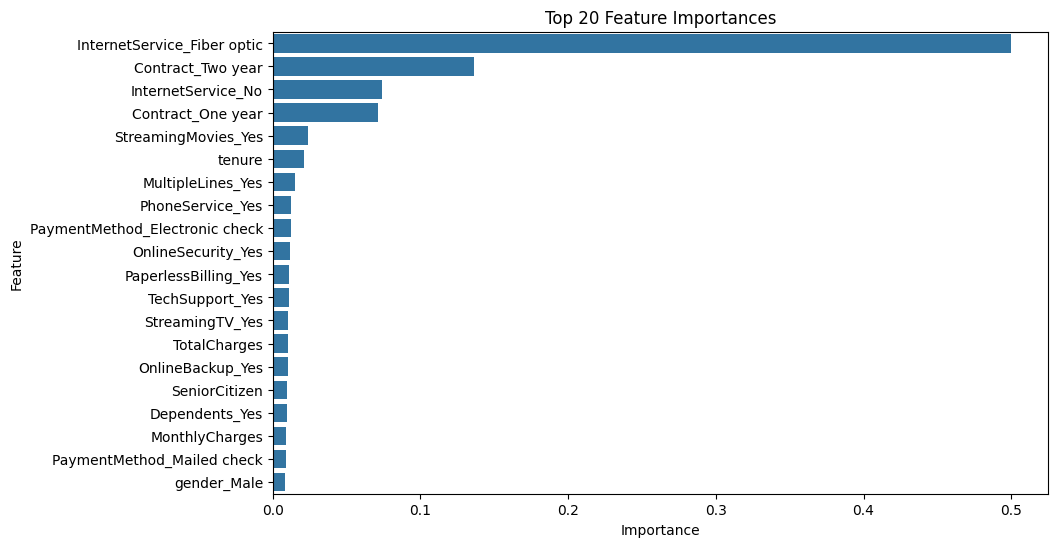

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**ROC Curve and AUC**

In [18]:
y_prob = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

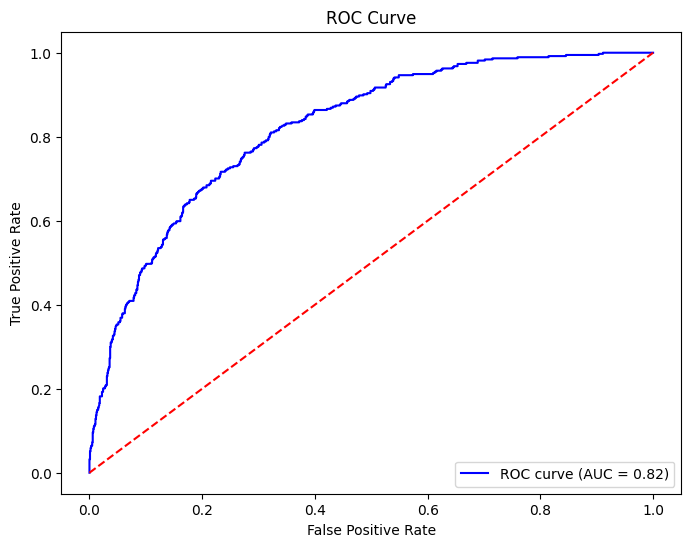

In [19]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

**Hyperparameter Tuning for XGBoost**

In [20]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

**Create XGBoost model**

In [21]:
xgb = XGBClassifier(eval_metric='logloss')

**Hyperparameter grid for tuning**

In [22]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

**GridSearchCV for tuning**

In [23]:
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

**Fit model on training data**

In [24]:
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.7, 1]},
             scoring='f1', verbose=1)

**Best parameters**

In [25]:
print("Best Parameters:", xgb_grid.best_params_)

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


**Evaluate Tuned XGBoost Model**

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

**Get the best estimator**

In [27]:
best_xgb = xgb_grid.best_estimator_

**Predict on test data**

In [28]:
y_pred = best_xgb.predict(X_test)

**Evaluation metrics**

In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Tuned XGBoost Evaluation ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

=== Tuned XGBoost Evaluation ===
Accuracy: 0.7991483321504613
Precision: 0.6501650165016502
Recall: 0.5267379679144385
F1 Score: 0.5819793205317577
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



**ROC Curve and AUC  (2)**

In [30]:
from sklearn.metrics import roc_curve, auc

**Probabilities for positive class**

In [31]:
y_prob = best_xgb.predict_proba(X_test)[:, 1]

**ROC**

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

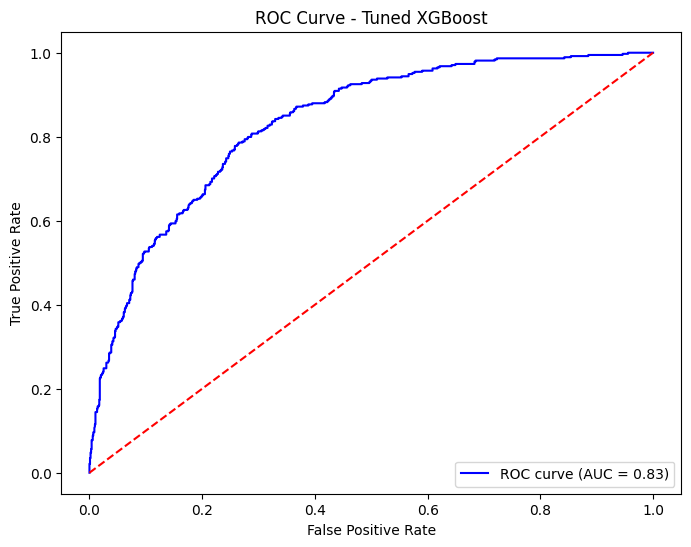

In [33]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend(loc='lower right')
plt.show()

In [34]:
print("AUC:", roc_auc)

AUC: 0.8321488542716164


**Continuing from Task 5, we are now implementing**

# Task 6 – Business Recommendations. This section uses the churn analysis and model results from Task 5 to guide actionable strategies.

**Task 6:**

**Business Recommendations Description:**

Based on the analysis and predictive
models, provide actionable recommendations to
the business. Suggest specific marketing
strategies, retention offers, or customer
engagement tactics. Estimate the potential
impact of these recommendations on revenue
and churn rate.

**Business Recommendations**

In [36]:
import joblib

**Save the tuned model (optional, in case we restart Colab)**

In [37]:
joblib.dump(best_xgb, "best_xgb_model.pkl")

['best_xgb_model.pkl']

**Predict churn probabilities on the full dataset**

In [38]:
X_full = X.copy()
X_full['Churn_Prob'] = best_xgb.predict_proba(X_full)[:,1]

**Identify high-risk customers (e.g., probability > 60%)**

In [39]:
high_risk_customers = X_full[X_full['Churn_Prob'] > 0.6]
print("Number of high-risk customers:", high_risk_customers.shape[0])

Number of high-risk customers: 1111


#Example recommendations:
**1. Targeted retention offers for high-risk customers**

**2. Loyalty programs for long-tenure customers with medium churn probability**

**3. Personalized engagement campaigns for customers with high monthly charges**

Estimate impact: assume retention campaigns reduce churn by 30% for high-risk customers

In [40]:
estimated_churn_reduction = 0.3 * high_risk_customers.shape[0]
estimated_churn_rate_after_intervention = (y.sum() - estimated_churn_reduction) / y.shape[0]

print("Estimated Churn Rate after interventions:", round(estimated_churn_rate_after_intervention, 3))

Estimated Churn Rate after interventions: 0.218


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

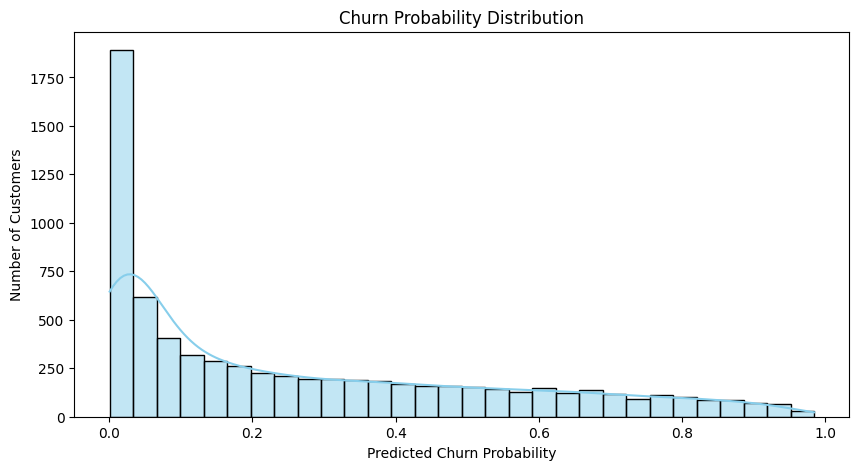

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(X_full['Churn_Prob'], bins=30, kde=True, color='skyblue')
plt.title("Churn Probability Distribution")
plt.xlabel("Predicted Churn Probability")
plt.ylabel("Number of Customers")
plt.show()

In [46]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [48]:
import numpy as np

Create a copy to avoid SettingWithCopyWarning

In [50]:
high_risk_customers = high_risk_customers.copy()

def restore_contract_type(df):
    if 'Contract_One year' in df.columns:
        conditions = [
            df['Contract_One year'] == True,
            df['Contract_Two year'] == True,
            (df['Contract_One year'] == False) & (df['Contract_Two year'] == False)
        ]
        choices = ['One year', 'Two year', 'Month-to-month']
        df.loc[:, 'ContractType'] = np.select(conditions, choices, default='Unknown')
    return df

high_risk_customers = restore_contract_type(high_risk_customers)

Plot Contract Type

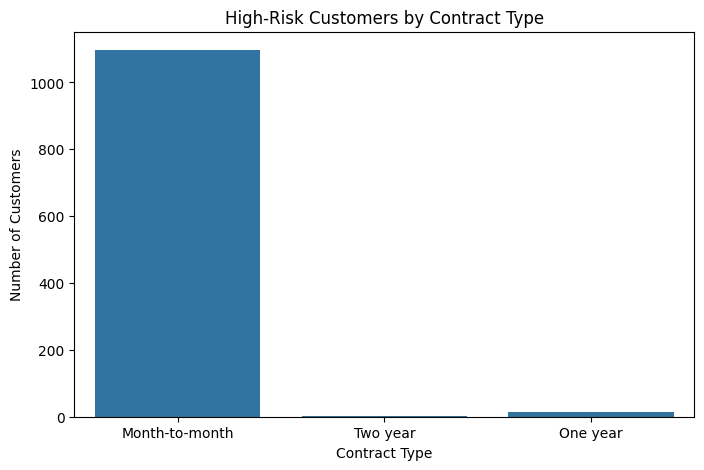

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(data=high_risk_customers, x='ContractType')
plt.title("High-Risk Customers by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()

Monthly Charges Distribution for High-Risk Customers

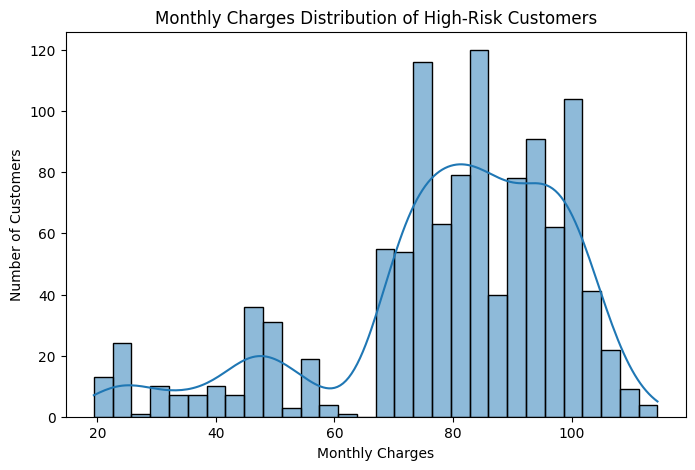

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(high_risk_customers['MonthlyCharges'], bins=30, kde=True)
plt.title("Monthly Charges Distribution of High-Risk Customers")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()

Tenure Distribution for High-Risk Customers

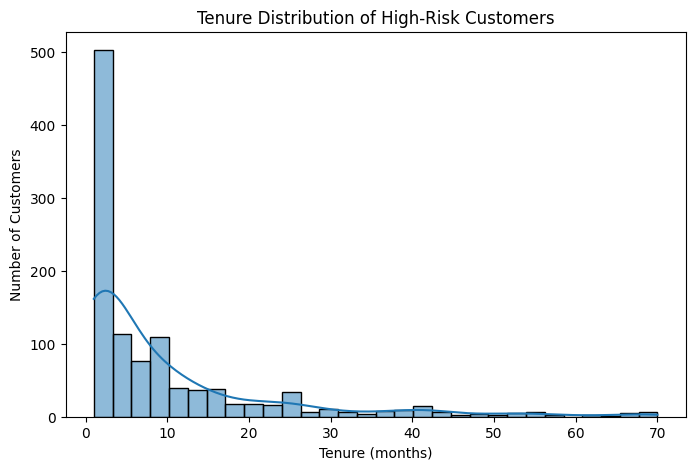

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(high_risk_customers['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution of High-Risk Customers")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

Business **Recommendations**

In [56]:
print("""
Business Recommendations:

1️⃣ Target retention efforts on high-risk customers who have short tenure and pay high monthly charges.
2️⃣ Provide incentives for contract renewals, especially for customers on 'Month-to-month' plans.
3️⃣ Reward loyal customers or offer discounts to those with higher monthly bills.
4️⃣ Regularly track these segments and monitor churn rates to assess the effectiveness of these strategies.
""")


Business Recommendations:

1️⃣ Target retention efforts on high-risk customers who have short tenure and pay high monthly charges.
2️⃣ Provide incentives for contract renewals, especially for customers on 'Month-to-month' plans.
3️⃣ Reward loyal customers or offer discounts to those with higher monthly bills.
4️⃣ Regularly track these segments and monitor churn rates to assess the effectiveness of these strategies.

